# ===========================================================
# Assignment 5: Tell me your secrets.
# ===========================================================

In [68]:
# import relevant package(s)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [50]:
# Taking input from the excel file and loading it to a data frame
df = pd.read_excel('Data/forestfires.xlsx')
# Printing out head to see how the data looks like
print(df.head())
# Checking the type of it (for no apparent reason)
type(df)

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


pandas.core.frame.DataFrame


## Question 5.1: Is there any particular season (or months) where a forest fire is more devastating?
### N.B.: Can this even be answered from the given dataset?


In [51]:
# Aggregating the data on monthly basis
df_sum = df.groupby(['month']).sum()
# subsetting the data frame by keeping only the 'burnt area'
# month is not an attribute here but index
df_area = df_sum[['area']]

# Printing out to see how it looks like; found that the grouped data is not ordered by months (Jan to Dec)
print(df_area)
# Re-indexing the dataframe to fix the order of the months
df_area = df_area.reindex(index = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec'])
# Printing out to see if the order has been fixed
print(df_area)




          area
month         
apr      80.02
aug    2297.99
dec     119.97
feb     125.50
jan       0.00
jul     459.83
jun      99.30
mar     235.26
may      38.48
nov       0.00
oct      99.57
sep    3086.13
          area
month         
jan       0.00
feb     125.50
mar     235.26
apr      80.02
may      38.48
jun      99.30
jul     459.83
aug    2297.99
sep    3086.13
oct      99.57
nov       0.00
dec     119.97


Text(0.5, 1.0, 'Burnt Forest Area by Month')

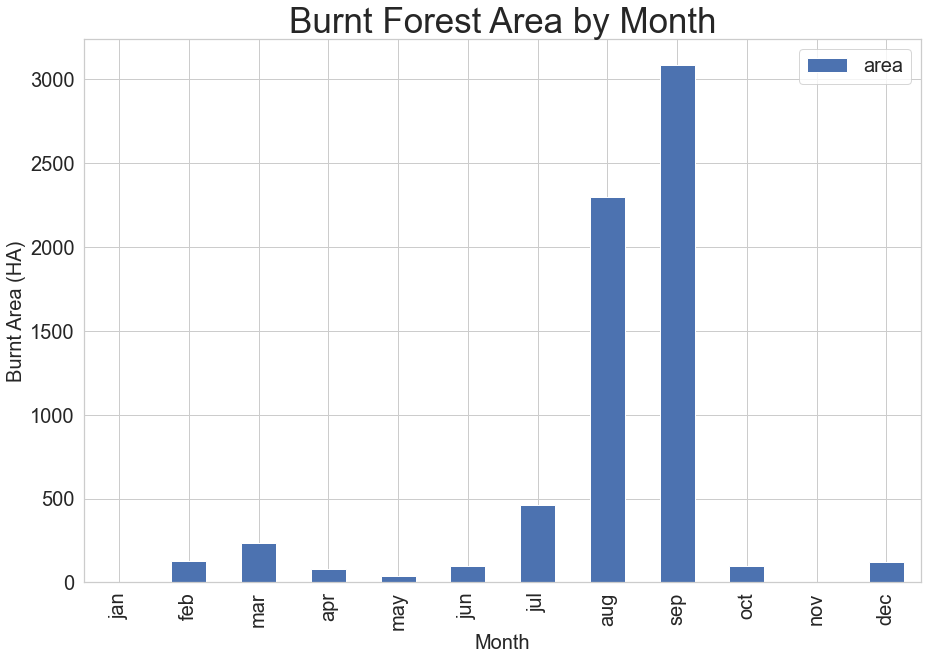

In [52]:
# Plotting the aggregated area for each month to identify how devasting each month was?
# Setting the size of the plot for a high-resolution plot and setting up the fonts for ticks, legend, and title.
df_area.plot.bar(figsize=(15, 10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Burnt Area (HA)',fontsize=20)
plt.title('Burnt Forest Area by Month',fontsize=35)

### Answer 5.1: By looking at the above plots, one can tell that the situation worsens during August and September, and it seems to start in July and finally ends in October.
### However, having only this data and the plot above may be confusing. We are summing up all records to calculate the burnt area of each month without thinking of how balanced the data is. For example, it could be the case that we have more samples for August and September than any other months, and thus when we sum up the monthly records, their value becomes very high compared to others.


In [53]:
# Calculating how many samples we have for each month
dataFreqByMonth = (df.groupby('month').size())
# Re-indexing to fix the order of the months
dataFreqByMonth=dataFreqByMonth.reindex(index = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec'])
# Printing out to see how balanced the data is
dataFreqByMonth

month
jan      2
feb     20
mar     54
apr      9
may      2
jun     17
jul     32
aug    184
sep    172
oct     15
nov      1
dec      9
dtype: int64

### Answer 5.1 Cont.: We can tell from the above statistics that the data acquisition is not well distributed among months. I would not conclude without having more info regarding how the acquisition is happening. If the acquisition is triggered by some set of input parameters that successfully detects the chances of fire, then this imbalanced data is representative. If this is not the case, then further processing is needed (i.e., we can plot the area per record by month).

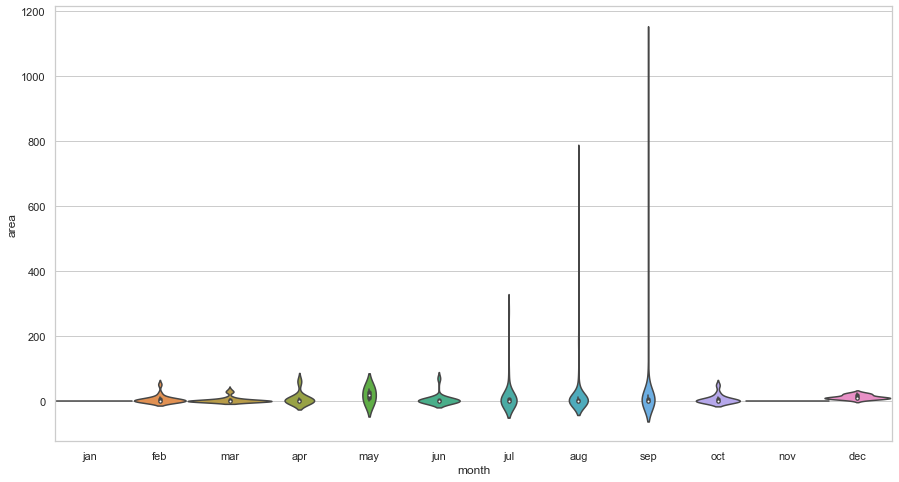

In [54]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="month", y="area", data=df, gridsize=500, width=1.2, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec'])

### Answer 5.1 Cont.: The violin plot above is fancier and requires less effort but contains more information than the barplot above. It automatically groups the data by months with simple commands and shows how the data points are distributed each month.

## Question 5.2: Let's assume 'area' is our target.<br>How correlated are each weather/dryness-related indices to the 'area'? Also, how correlated are they to each other?

### List of the weather/dryness related features:
- The Fine Fuel Moisture Code (FFMC) represents the fuel moisture of forest litter fuels under the shade of a forest canopy
- The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter
- The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil
- The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread
- Temperature
- RH: Relative Humidity
- Wind
- Rain


In [55]:
# Generating a correlation matrix
df_corr = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

corr = df_corr.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='PuOr_r', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(3))

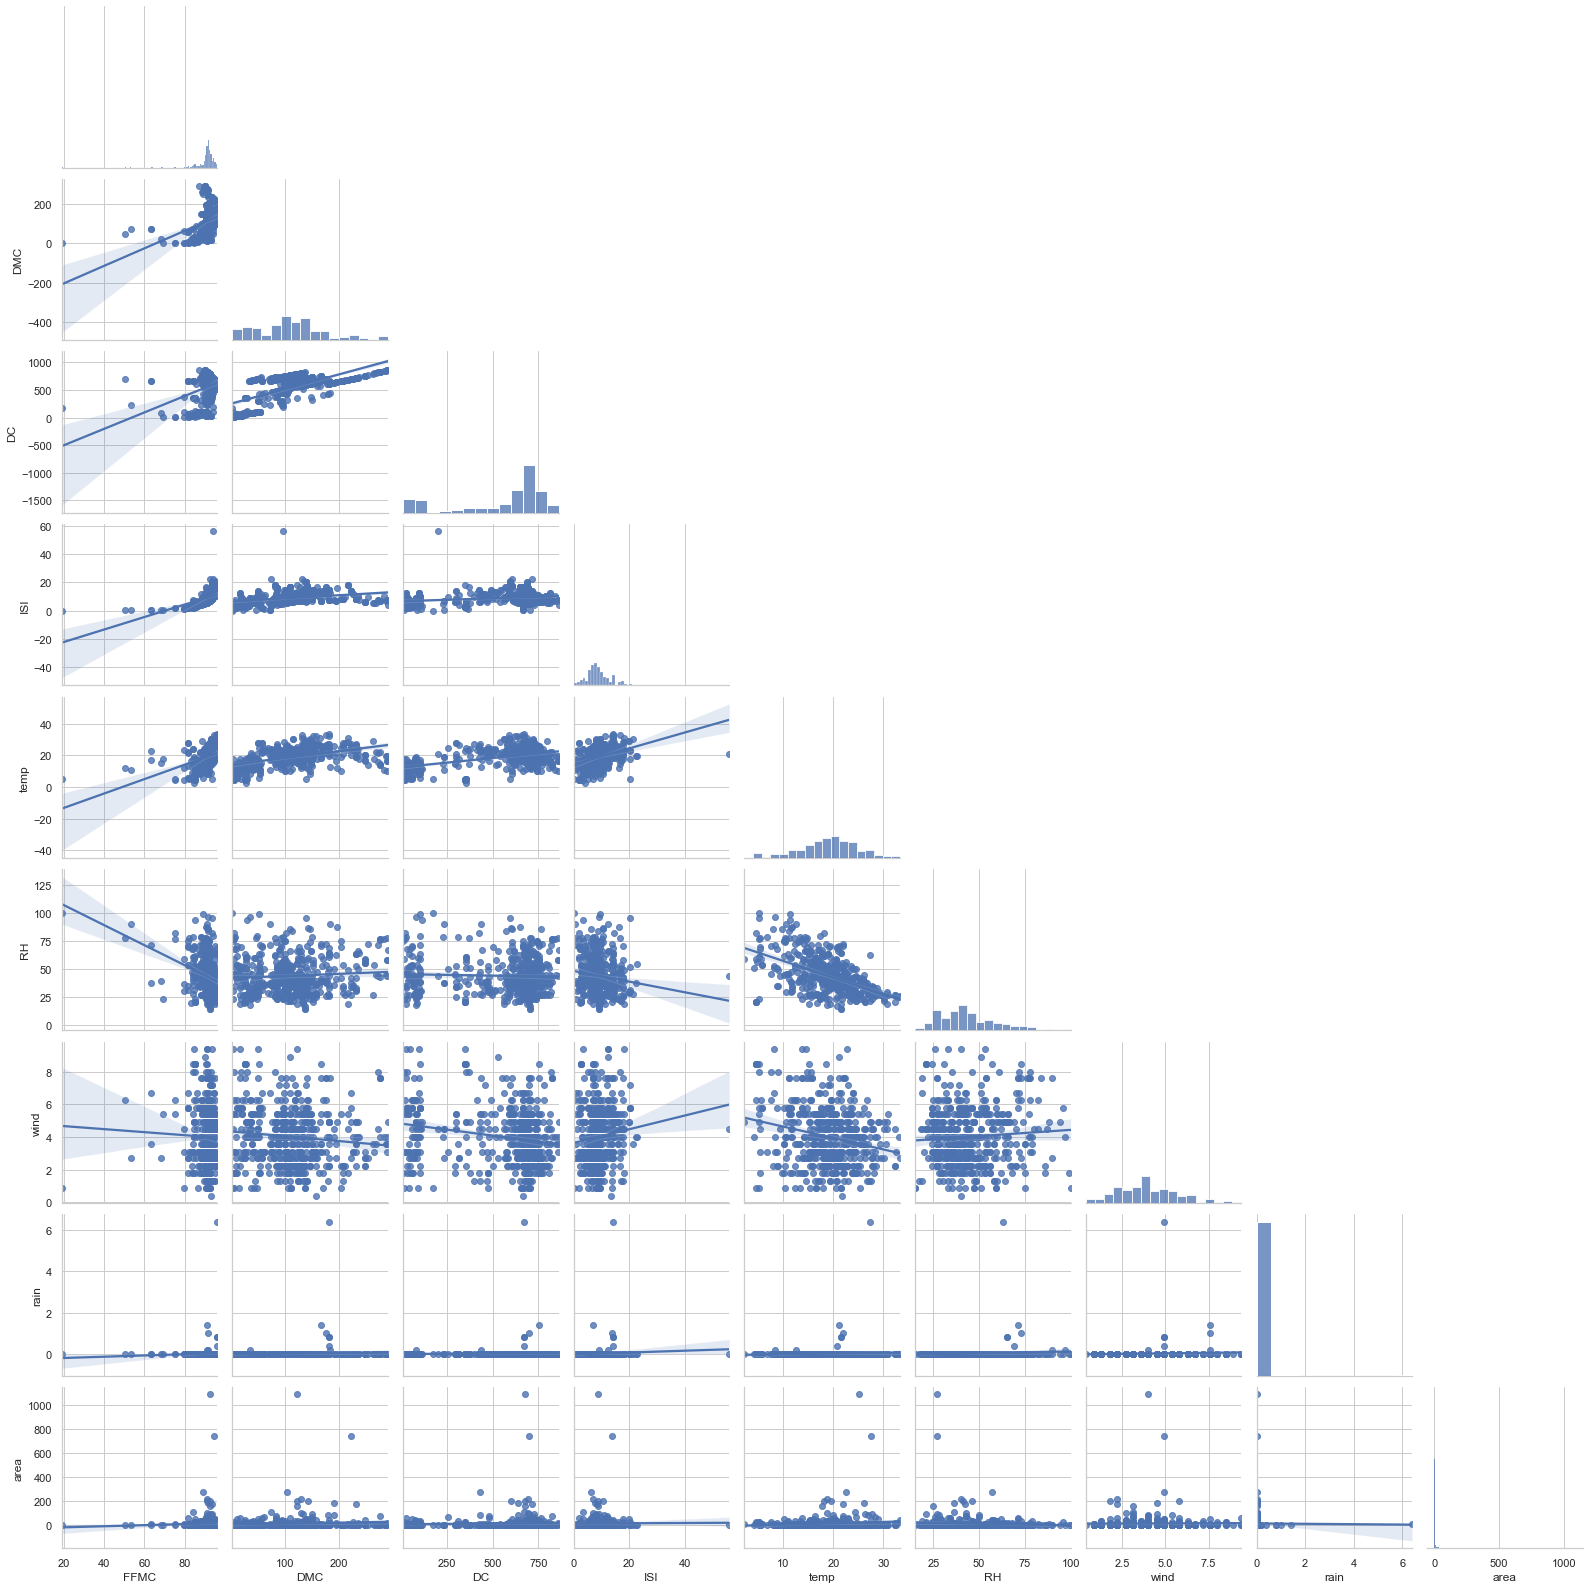

In [56]:
#Generating pair plot

sns.set_context( rc={"font_scale":30})

g = sns.pairplot(df_corr, 
    kind='reg',
    diag_kind="hist",
    corner=True,
    )



### Answer 5.2: There is almost no correlation between the area and any other variable. We can tell by looking at the correlation matrix and the pair plot. I included a trendline in the pair plot, and if we focus on the 'area' row, we see completely flatlines for each pair.
### There are some correlation between different variables such as DMC & DC, FFMC & ISI, RH & Temp (negative corr.) etc.


## Question 5.3: Do they (the weather/dryness variables) show any relation between them if we group them by month?

In [57]:
# Converting the month column from string to int
df["month"].replace({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}, inplace=True)
df["month"] = df["month"].astype(int)
df

X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      3  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      3  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      3  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      8  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      8  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3     11  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

In [58]:
# Plotting a pair plot color-coded by months to see if they show any relation
fig = px.parallel_coordinates(df, color="month",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=6)
fig.show()

### Answer 5.3: Although I couldn't find a way to assign distinct colors to each of the months, we can tell that the variables show some relations when we group them via months. For example, the teal-colored lines are basically the first quadrant, and they show high value for FFMC but low for DMC and DC. On the other hand, the last quadrant of the year shows a high value for DC while showing similar characteristics for the other two variables.

# ===========================================================
# Assignment 5 ends here. 
# ===========================================================

# ===========================================================
# Assignment 6: Data munging is fun!
# ===========================================================

## Question 6.1: How many rows and columns do your data have?


In [59]:
# Printing out the shape of the dataframe to see how many rows and columns we have
print(df.shape)

(517, 13)


### Answer 6.1: Here, we have 13 columns/variables and a total of 517 rows/observations in the data.

## Question 6.2: What are the different data types in the dataset (e.g., string, Boolean, integer, floating, date/time, categorical, etc.)?

In [60]:
# Printing out the list of variables and associated data types
print(df.dtypes)

X          int64
Y          int64
month      int32
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


### Answer 6.2: We have three different data types here in this dataframe: Integer (int64), Float (float64), and Object. X, Y, and RH variables are integer variables, month and day are object types, and the rest of the variables are float types.

## Question 6.3: What variables would you rename to make your visualization look better?

### Answer 6.3: For this particular dataset, I would keep the name of the variables as it is since they are abbreviated well. For example, the 'DC' variable represents DC (Drought Code) index from the FWI (Fire Weather Index) system. All other variables also represent a shorter and concise version of their definition.

## Question 6.4: Describe any missing values. Using the rule of thumb in Data Visualization Made Simple, would you remove those rows or columns?

In [61]:
# Checking if there are any missing values in the dataset
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Answer 6.4: If we follow the above code snippet, we can see that we do not have any missing values in the dataset; hence, we do not have to remove observations or variables here. However, if we had seen some missing values in the data, it would need to be adjusted accordingly. For example, let's assume for almost all of these records, we found that the value of RH is missing. In that case, we would have removed this variable instead of eliminating the observations. On the other hand, if we had seen temp has null for three observations in the dataset, we could have removed only those three observations. There are different techniques for estimating a missing value so that we do not need to remove those observations.

## Question 6.5: What other cleaning / prep steps would you do, based on the advice in Data Visualization Made Simple.

In [62]:
# For example, let's see we want to work on a subset of this forest fire dataset where we only consider the observations with some burnt area.
# Meaning, we want to only consider the observations where the 'area' value is greater than 0.0
# By seeing the .head() functions output above, it seems evident that the value of rain is mostly zero.
# But, we cannot tell that with certainty by only looking at the first five observations.
# So, let's see how many observations have rain (a positive value) out of these 517 rows.
print('Observations with rain:',len(df[df["rain"] > 0]))

Observations with rain: 8


In [63]:
# Preparing a new dataframe by keeping observations with burnt area only
df_burnt = df[df["area"] > 0]

print('Observations with rain after dropping no-burnt area(s):',len(df_burnt[df_burnt["rain"] > 0]))

# Since, there are only 8 records with positive values for rain, for the further analysis, I am dropping rain while selecting observations with burnt areas only
#df_burnt = df[df["area"] > 0][['X','Y','month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']]
print('\n',df_burnt)

Observations with rain after dropping no-burnt area(s): 2

      X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
138  9  9      7  tue  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0   0.36
139  1  4      9  tue  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0   0.43
140  2  5      9  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0   0.47
141  1  2      8  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0   0.55
142  8  6      8  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0   0.61
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
509  5  4      8  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17
510  6  5      8  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43
512  4  3      8  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16

[270 rows x 13 

### Answer 6.5: Here, I am assuming that my further analysis will only require observations of burnt area. So, I have excluded those observations that do not have positive values in the burnt area variable and got 270 observations out of those 517. Also, I have seen only eight records with rain in the whole dataset, and after filtering for the burnt areas, there remain only 2. So, I have then decided to drop the 'rain' column.

# ===========================================================
# Assignment 6 ends here. 
# ===========================================================

# ===========================================================
# Assignment 8: Visualizing correlation, comparisons, and trends.
# ===========================================================

## Question 8.1: Do the weather/dryness variables show any relation between them if we group them by month? Below is the list of those variables.
### List of the weather/dryness related features:
- The Fine Fuel Moisture Code (FFMC) represents the fuel moisture of forest litter fuels under the shade of a forest canopy
- The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter
- The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil
- The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread
- Temperature
- RH: Relative Humidity
- Wind
- Rain

In [65]:
# Plotting a pair plot color-coded by months to see if they show any relation
fig = px.parallel_coordinates(df, color="month",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=6,
                              title="Relations between weather/dryness variables while grouping them by month")
fig.show()

### Answer 8.1: Although I couldn't find a way to assign distinct colors to each of the months, we can tell that the variables show some relations when we group them via months. For example, the teal-colored lines are basically the first quadrant and they show high value for FFMC but low for DMC and DC. On the other hand, the last quadrant of the year shows a high value for DC while showing similar characteristics for the other two variables.

# ===========================================================
# Assignment 8 ends here. 
# ===========================================================

# ===========================================================
# Assignment 9: Visualizing distributions and part-to-whole
# ===========================================================

## Question 9.1: How is the area of forest fire distributed over months?

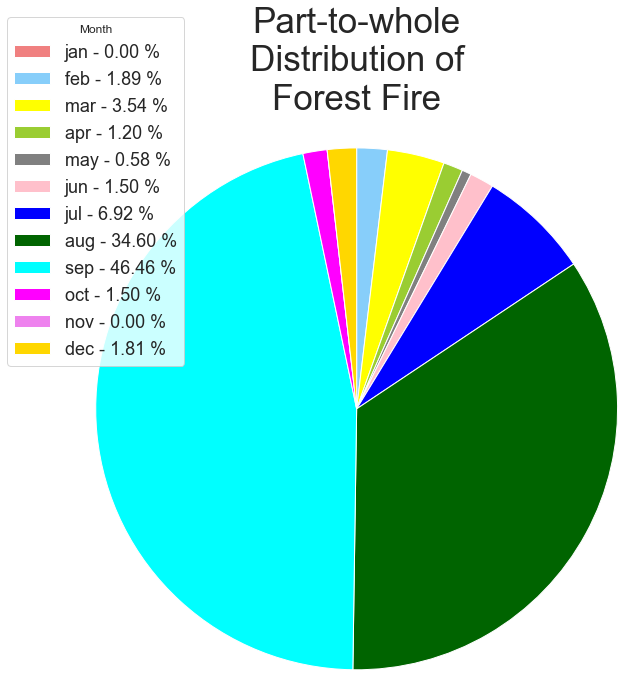

In [66]:
df_pie_plot = df_sum[['wind', 'area']]
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_pie_plot = df_pie_plot.loc[months]
x = df_pie_plot.index.tolist()
y = df_pie_plot['area'].tolist()
percent = [100*ey / sum(y) for ey in y]
colors = ['lightcoral','lightskyblue','yellow','yellowgreen','grey','pink','blue','darkgreen','cyan','magenta','violet','gold']
patches, texts = plt.pie(y, colors = colors, counterclock=False, startangle=-270, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.title('Part-to-whole\nDistribution of\nForest Fire\n\n', loc='center',fontsize=35)

plt.legend(patches, labels, title = 'Month', loc='center', bbox_to_anchor=(-0.1, 1.),
           fontsize=18)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


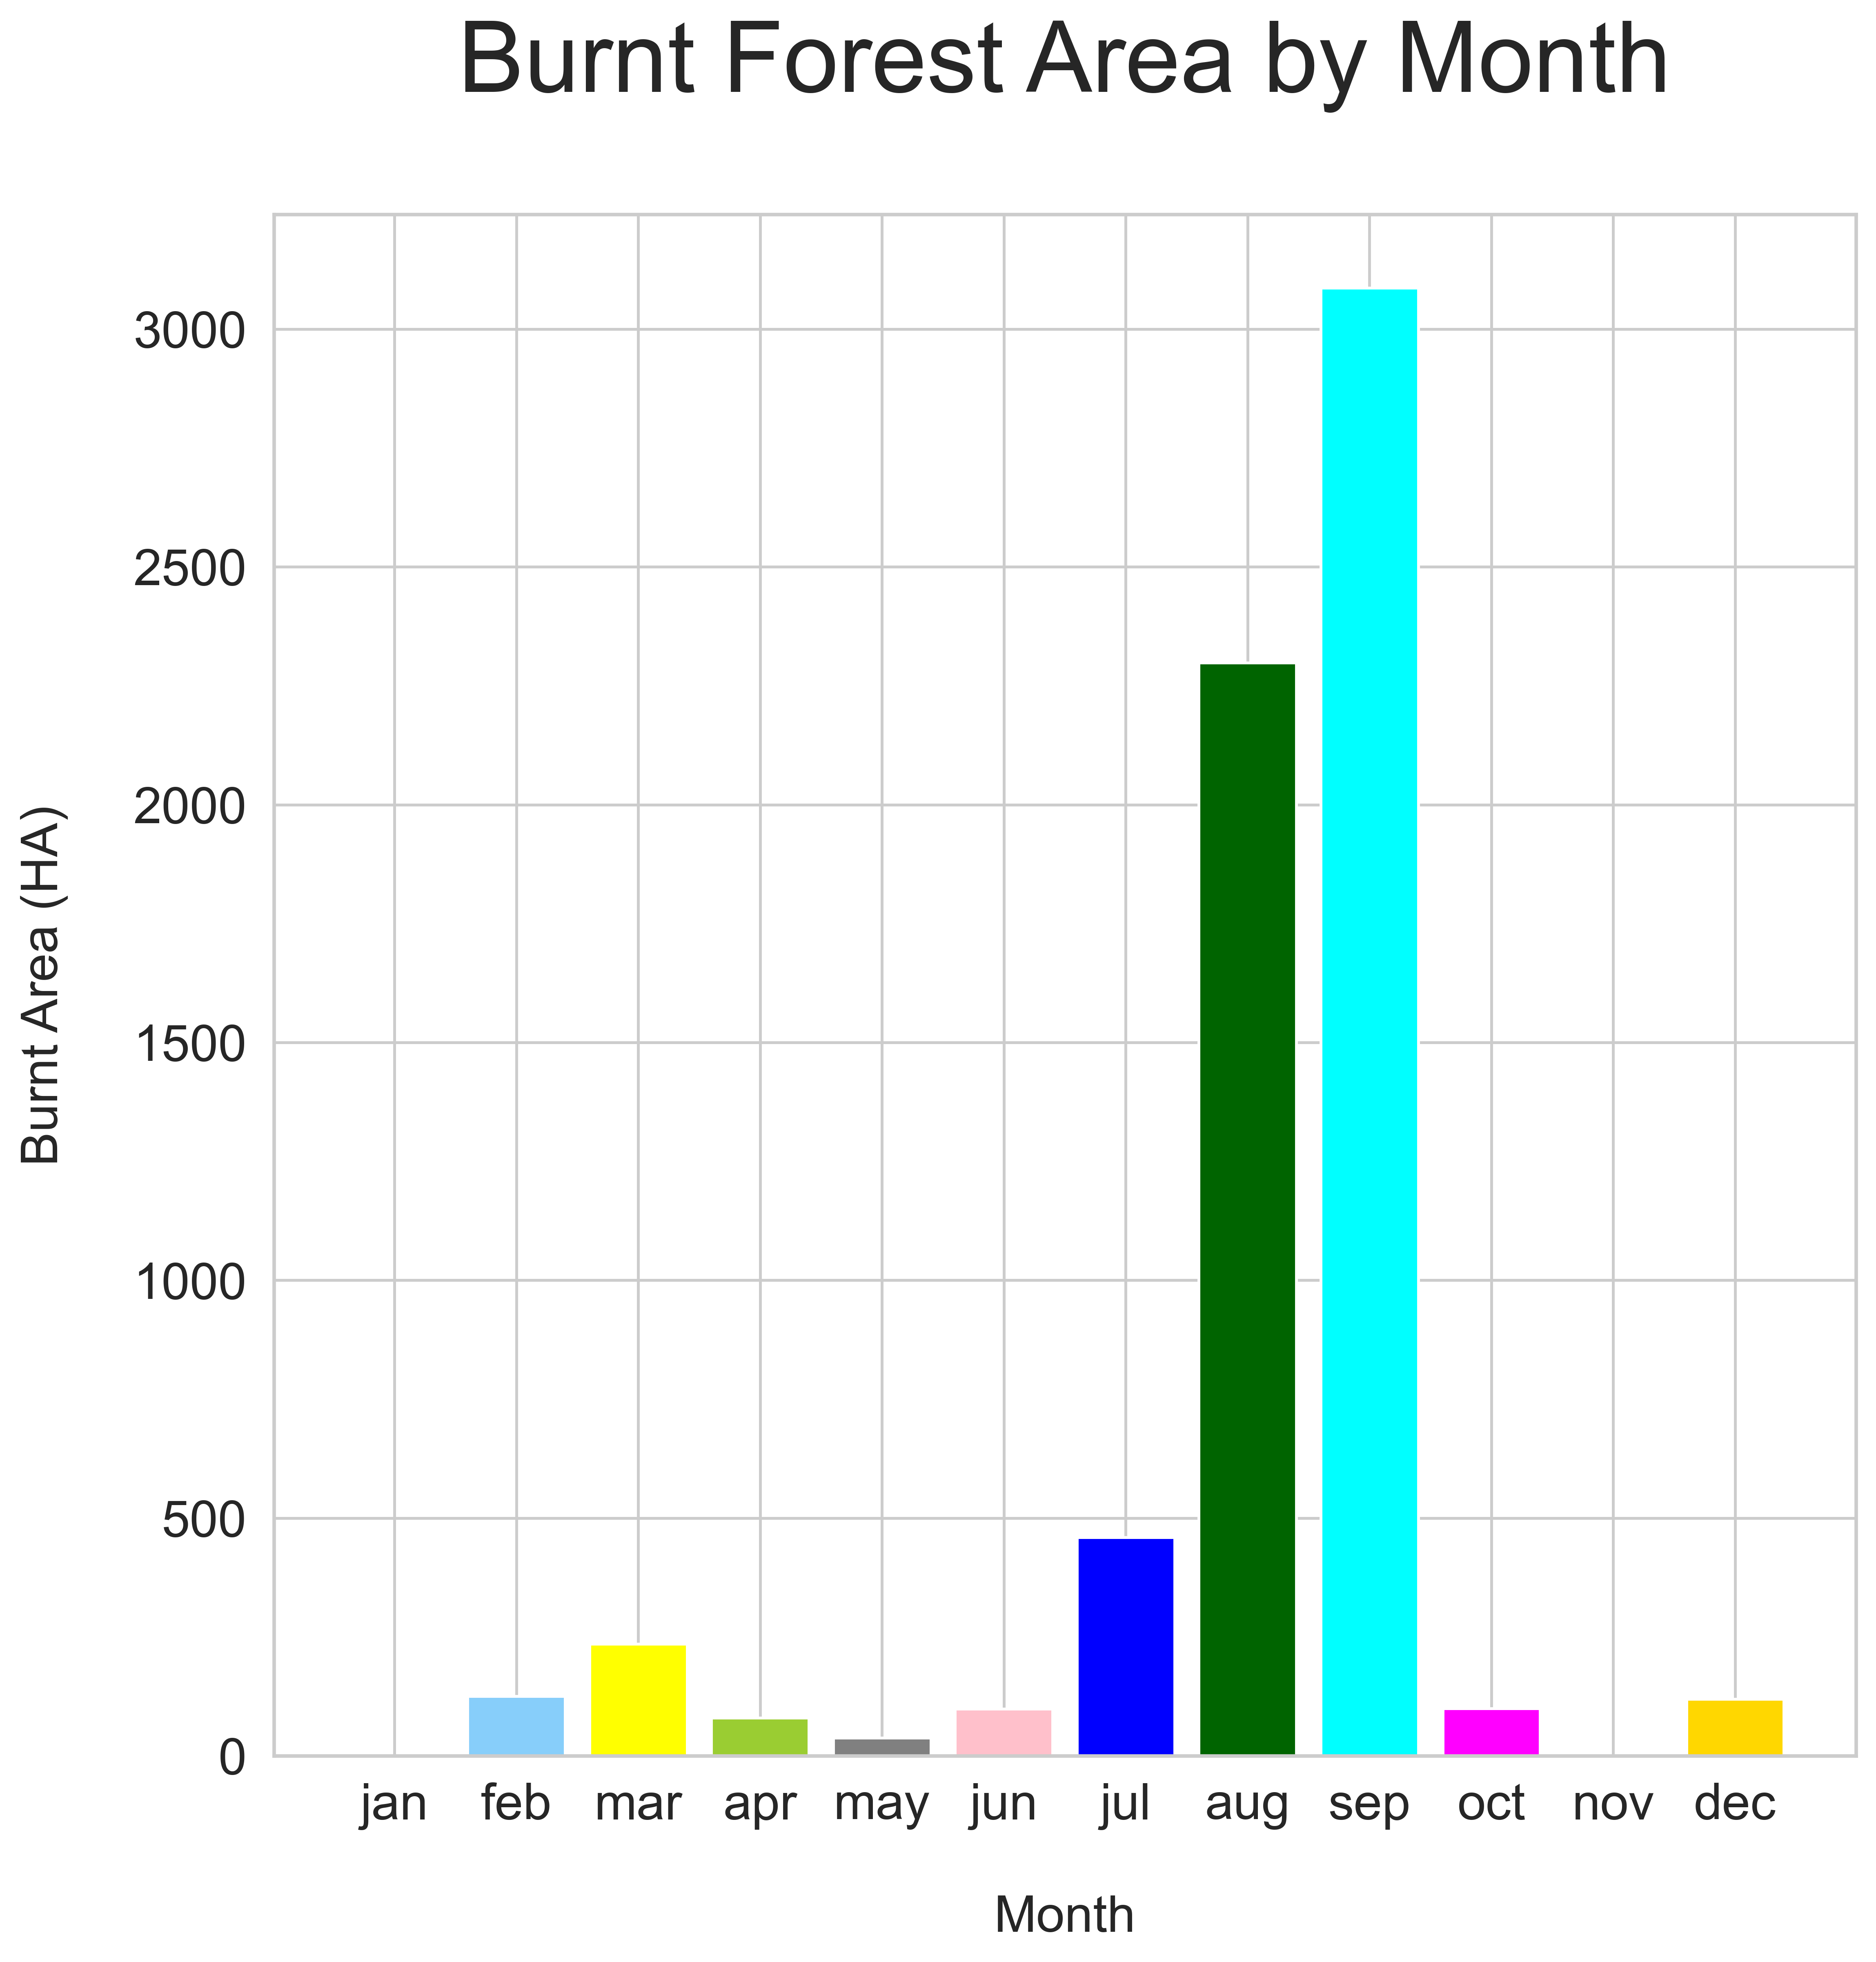

In [67]:
# Plotting the aggregated area for each month to identify how devasting each month was?
# Setting the size of the plot for a high-resolution plot and setting up the fonts for ticks, legend, and title.
df_bar_plot = df_area.loc[months]
x = df_bar_plot.index.tolist()
y = df_bar_plot['area'].tolist()
x_pos = np.arange(len(x))
print(x_pos)
plt.figure(figsize=(10, 10), dpi=500)

plt.bar(x_pos, y, color=['lightcoral','lightskyblue','yellow','yellowgreen','grey','pink','blue','darkgreen','cyan','magenta','violet','gold'])
plt.xticks(x_pos, x)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.legend(fontsize=18)
plt.xlabel('\nMonth',fontsize=18)
plt.ylabel('Burnt Area (HA)\n',fontsize=18)
plt.title('Burnt Forest Area by Month\n',fontsize=35)
plt.legend('',frameon=False)

### Answer 9.1: The bar and pie plots above represent the affected areas' distribution over months and convey different key information related to the distribution. The bar plot tells us the actual burnt area by months (including unit), while the pie chart on the right tells us the corresponding percentage by showing the same visually. On top, the color palette has been kept analogous to make it easily comparable to the readers.
### I could have avoided these two charts and instead made one (any one of these two) with all the information from both charts (actual burnt area, percentage, and color palette to identify the corresponding months). However, I thought that route could outflow the readers and undermine the actual goal of information portrayal.


# ===========================================================
# Assignment 9 ends here. 
# ===========================================================

# ===========================================================
# Assignment 10: Visualizing geospatial data
# ===========================================================


In [71]:
# import relevant package(s)
import geopandas as gpd

In [74]:
# import relevant shapefile
us_map = gpd.read_file("Data/Shapefile_US/tl_2020_us_zcta510.shp")

In [77]:
# import relevant data
data=pd.read_csv("Data/zipcode_wise_tweet_count_IN.csv")

In [80]:
# printing out the shapefile and data (head of them) to see how they look like
print(us_map.head())
print(data.head())

  ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     43451   43451        B5   G6350          S   63484189    157689   
1     43452   43452        B5   G6350          S  121525288  13721740   
2     43456   43456        B5   G6350          S    9320978   1003775   
3     43457   43457        B5   G6350          S   48004678         0   
4     43458   43458        B5   G6350          S    2573816     39915   

    INTPTLAT10    INTPTLON10  \
0  +41.3183193  -083.6150363   
1  +41.5202297  -082.9770334   
2  +41.6318300  -082.8393923   
3  +41.2673301  -083.4274872   
4  +41.5304461  -083.2133648   

                                            geometry  
0  POLYGON ((-83.70873 41.32733, -83.70815 41.327...  
1  POLYGON ((-83.08698 41.53780, -83.08256 41.537...  
2  MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...  
3  POLYGON ((-83.49650 41.25371, -83.48382 41.253...  
4  POLYGON ((-83.22229 41.53102, -83.22228 41.532...  
  ZCTA5CE10  t_count
0     46001     7

In [78]:
# merging them based on ZCTA5CE10 which is zip-code
map_data = us_map.merge(data, on="ZCTA5CE10")

In [81]:
# printing out newly created map_data to see how it looks like
map_data.head()

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     46711   46711        B5   G6350          S  154381218    687624   
1     46714   46714        B5   G6350          S  333681846   2342500   
2     46721   46721        B5   G6350          S  208241369     34140   
3     46723   46723        B5   G6350          S  161668274   1229177   
4     46725   46725        B5   G6350          S  531588827   5845173   

    INTPTLAT10    INTPTLON10  \
0  +40.6619506  -084.9268793   
1  +40.7226516  -085.1765263   
2  +41.4230971  -084.8766511   
3  +41.2458230  -085.3267522   
4  +41.1485436  -085.4757680   

                                            geometry  t_count  
0  POLYGON ((-85.06742 40.68502, -85.06735 40.684...     3453  
1  POLYGON ((-85.33536 40.78540, -85.33508 40.785...     3186  
2  POLYGON ((-84.98295 41.39466, -84.98291 41.394...     1300  
3  POLYGON ((-85.46170 41.26573, -85.46143 41.266...     6908  
4  POLYGON ((-85.61971 41.17735, -85.61970 41.177...     9756

## Question 10.1: Given that we have access to a dataset that contains the number of tweets grouped by zip codes made from Indiana during 2014, we would like to know how they are geographically distributed. What are the key takeaways from the distribution?

(-88.26355985000001, -84.61886714999999, 37.57222074999999, 41.96014825)

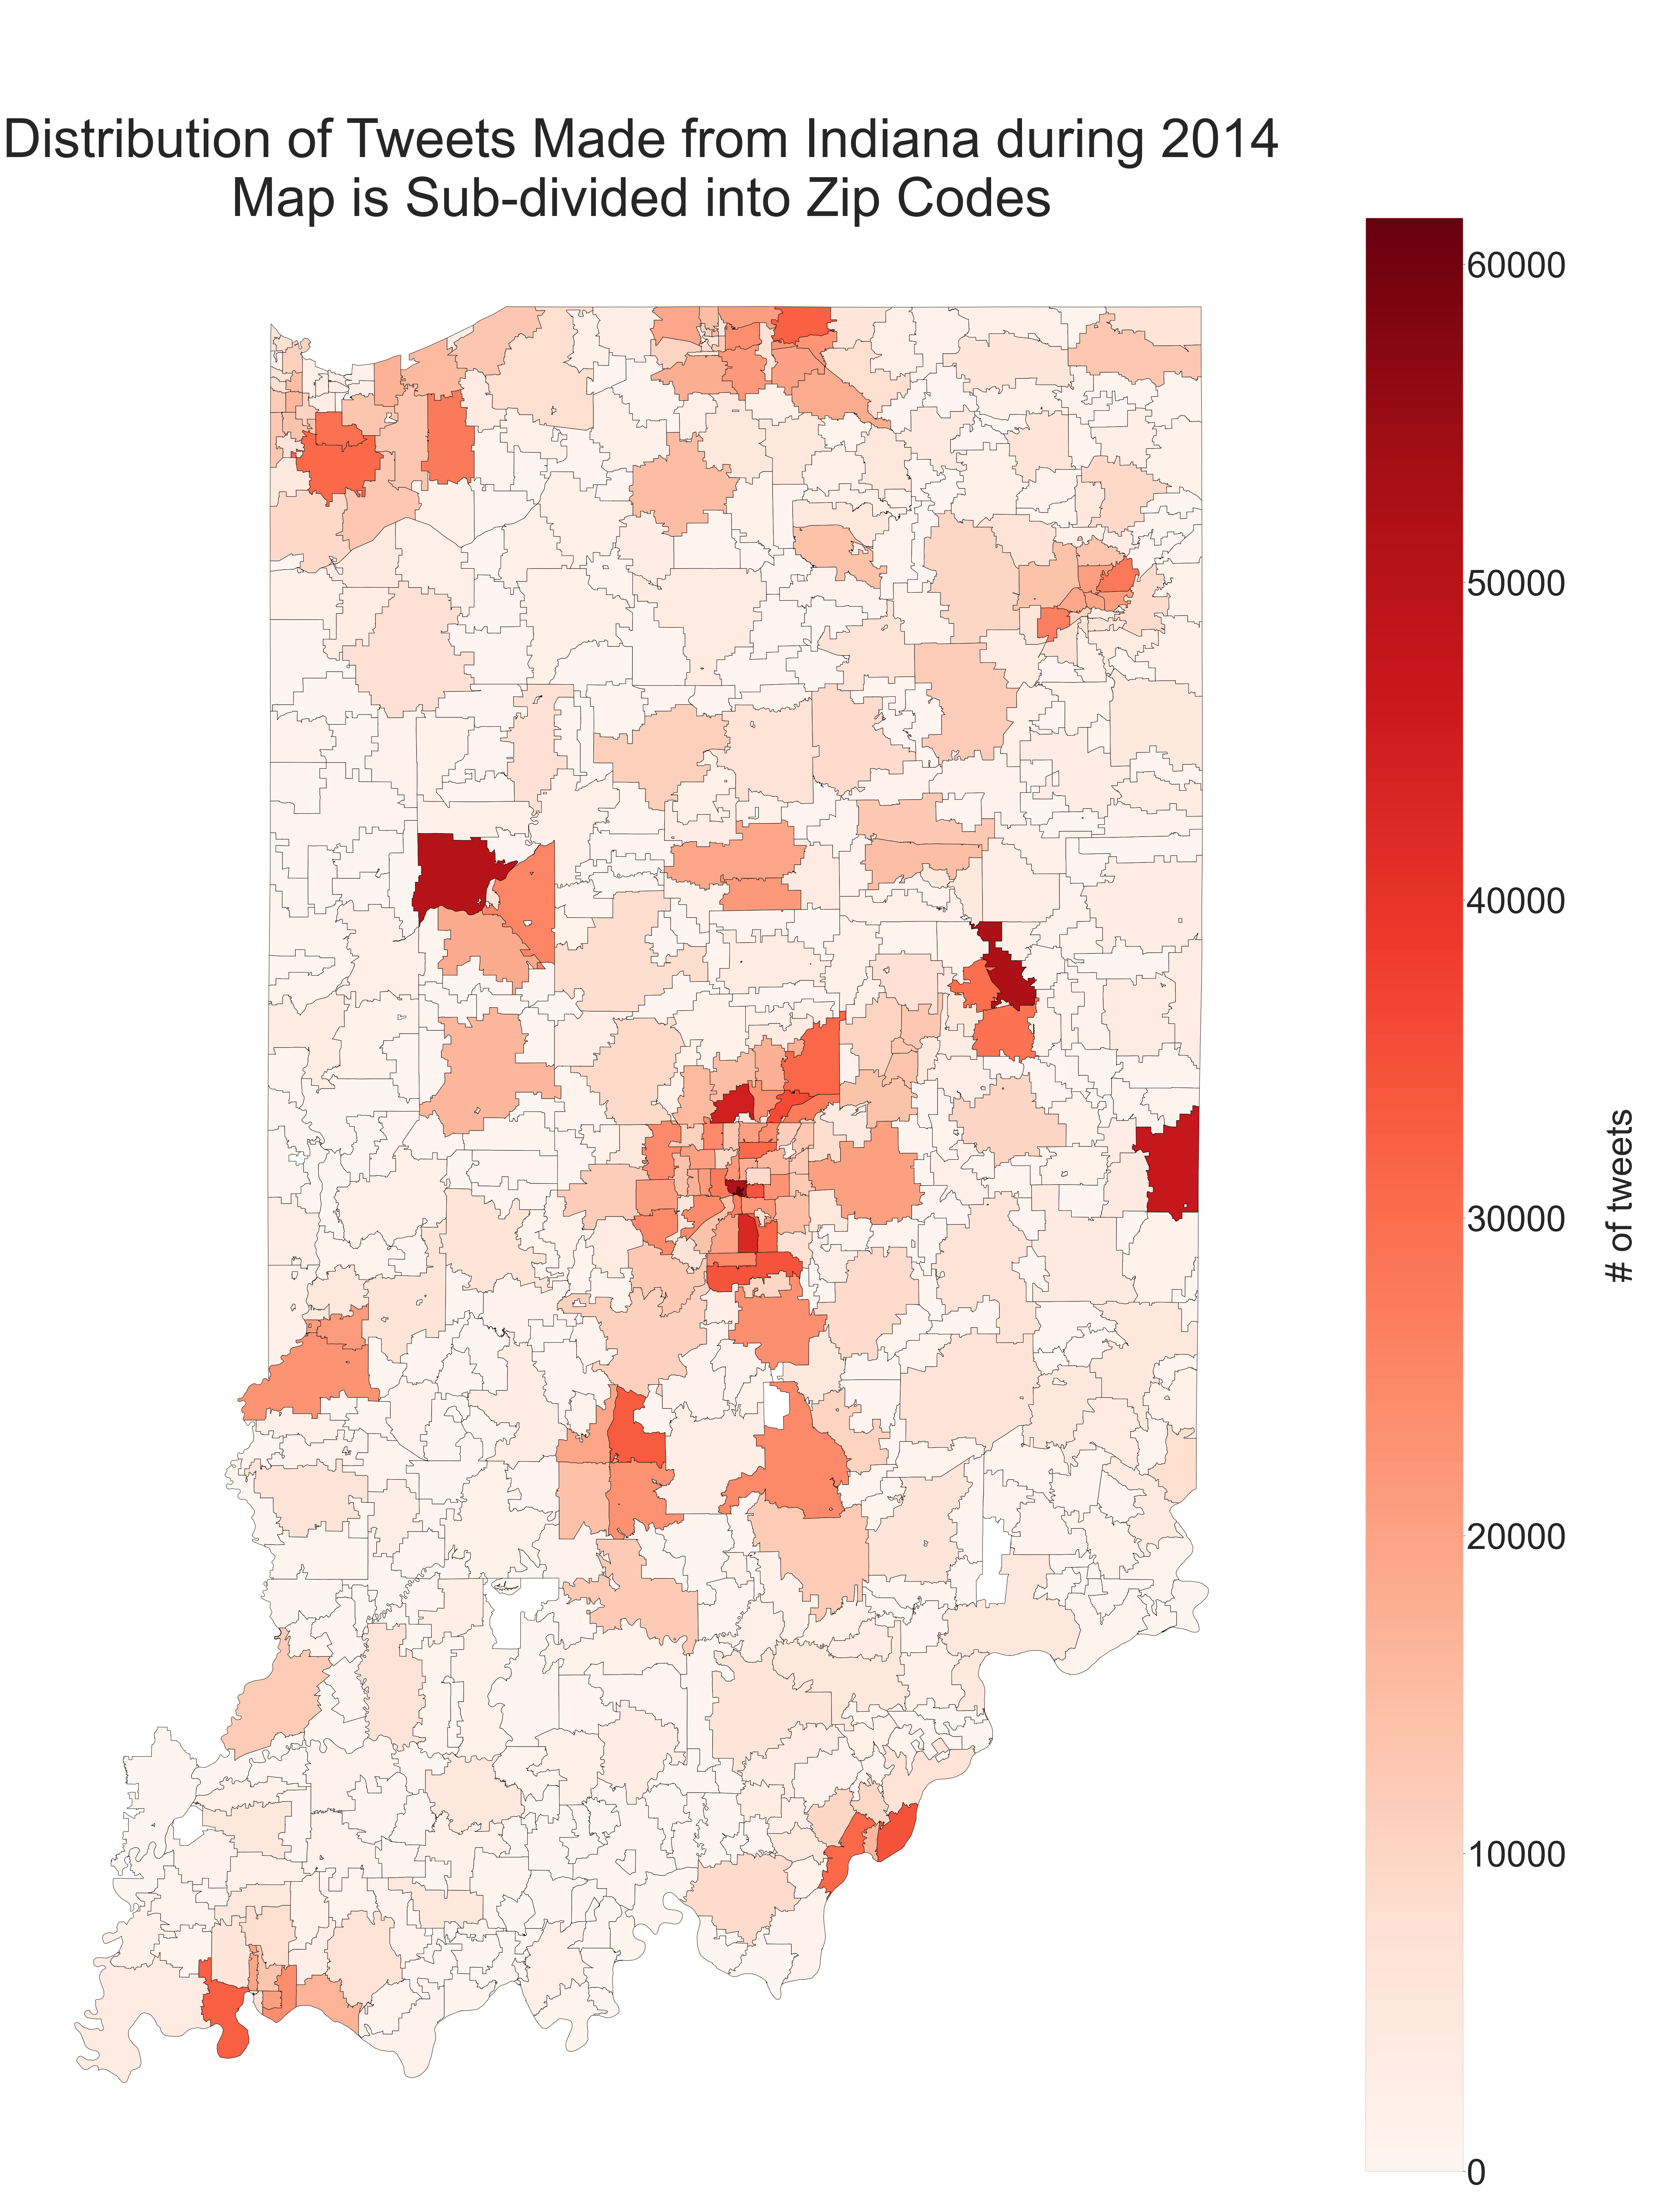

In [85]:
fig, ax = plt.subplots(1, figsize=(100, 100))
fig.patch.set_facecolor('white')
plt.xticks(rotation=90)
plt.yticks(fontsize=50)
map_data.plot(column="t_count", cmap="Reds", linewidth=1, ax=ax, edgecolor="0")
plt.title('\n\nDistribution of Tweets Made from Indiana during 2014\nMap is Sub-divided into Zip Codes', fontdict = {'fontsize' : 150})
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax= max(map_data['t_count'])))
bar_info._A = []
cbar = fig.colorbar(bar_info)
cbar.ax.tick_params(labelsize=100)
cbar.ax.set_ylabel('\n# of tweets\n', rotation=90, fontsize = 100)
ax.axis("off")

### Answer 10.1: The map tells us about the distribution, and the associated color bar on the right helps decode the distribution. As stated in the title, the map is sub-divided by zip codes, and the data is from 2014, representing tweet counts from Indiana.
### In my opinion, the key takeaways are:
- Areas that contribute most are geographically smaller (possibly indicating highly populated areas).
- Although some areas contribute 50,000 or more tweets, most of the areas’ contribution is around 10k-15k.
- More active users reside in the center than in the bordering areas.

### About data source: Data related to tweets is a subset of the data collected from Twitter that contains tweets from the United States of America for 2014. I use United States Census Bureau’s shapefiles to plot the geographical maps (available here: https://www2.census.gov/geo/tiger/TIGER2020/ZCTA5/).


# ===========================================================
# Assignment 10 ends here. 
# ===========================================================

In [79]:
map_data.head()

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0     46711   46711        B5   G6350          S  154381218    687624   
1     46714   46714        B5   G6350          S  333681846   2342500   
2     46721   46721        B5   G6350          S  208241369     34140   
3     46723   46723        B5   G6350          S  161668274   1229177   
4     46725   46725        B5   G6350          S  531588827   5845173   

    INTPTLAT10    INTPTLON10  \
0  +40.6619506  -084.9268793   
1  +40.7226516  -085.1765263   
2  +41.4230971  -084.8766511   
3  +41.2458230  -085.3267522   
4  +41.1485436  -085.4757680   

                                            geometry  t_count  
0  POLYGON ((-85.06742 40.68502, -85.06735 40.684...     3453  
1  POLYGON ((-85.33536 40.78540, -85.33508 40.785...     3186  
2  POLYGON ((-84.98295 41.39466, -84.98291 41.394...     1300  
3  POLYGON ((-85.46170 41.26573, -85.46143 41.266...     6908  
4  POLYGON ((-85.61971 41.17735, -85.61970 41.177...     9756